In [1]:
from mcm import EcModel
reference= 'eclogitization_sammon'
rxnName='ecoligitzation_agu5_slb_rx'

In [2]:
X_Mg_garnet = 9.888
X_Ca_garnet = 10.549
X_Fe_garnet = 16.369
X_tot_garnet = X_Mg_garnet+X_Ca_garnet+X_Fe_garnet

X_py = X_Mg_garnet/X_tot_garnet
X_alm = X_Fe_garnet/X_tot_garnet
X_gr = X_Ca_garnet/X_tot_garnet

print(X_py, X_alm, X_gr)

X_Na_cpx = 6.326

X_Mg_cpx = 9.451
N_Mg_cpx = 0.498

X_Ca_cpx = 14.948
N_Ca_cpx = 0.566

X_Fe_cpx = 2.304
N_Fe_cpx = 0.068

X_Al_cpx = 10.407

X_tot_cpx = X_Na_cpx + X_Mg_cpx + X_Ca_cpx + X_Fe_cpx + X_Al_cpx

N_Ca_di = N_Mg_cpx
X_Ca_di = (N_Ca_di / N_Ca_cpx) * X_Ca_cpx
X_Ca_he = X_Ca_cpx - X_Ca_di

X_di = (X_Mg_cpx + X_Ca_di) / X_tot_cpx
X_jd = (X_Na_cpx + X_Al_cpx) / X_tot_cpx
X_he = 1 - X_di - X_jd

print(X_di, X_jd, X_he)

0.26865185024180843 0.44473727109710376 0.28661087866108786
0.5203777329514817 0.38523344691039685 0.09438882013812144


In [3]:
phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases

# initialize with eclogitic compositions
# 40% cpx, 33% garnet
# Mg# should be around 50

## Eclogite facies
mi0_eclogite = [
    0.40, # cpx
    0.00, # opx
    0.20, # quartz
    0.00, # feldspar
    0.33, # garnet
    0.07, # kyanite
 ]

# Granulite facies
mi0_granulite = [
    0.09, # cpx
    0.24, # opx
    0.08, # quartz
    0.51, # feldspar
    0.0, # garnet
    0.07, # kyanite
]

# Cik0 = mass fractions
# Xik0 = mol fractions
# note: * = thermodynamic endmember, set to zero
Xik0 = [
    [0.25, 0.25, 0., 0., 0.5], # di, hed, *cEn, *cats, jd
    [0.5, 0.5, 0., 0.], # en, fs, *mats, *oDi
    [1.], # quartz
    [0.25, 0.75], # an, ab
    [0.4, 0.4, 0.2, 0., 0.], # py, alm, gr, *mgmaj, *namaj
    [1.], # ky
]


[ 0.00036734 -0.00072551  0.          0.01272827  0.         -0.
 -0.          0.          0.          0.00355533 -0.01623441 -0.
 -0.00022795  0.0004852   0.00018439  0.          0.         -0.00013266]


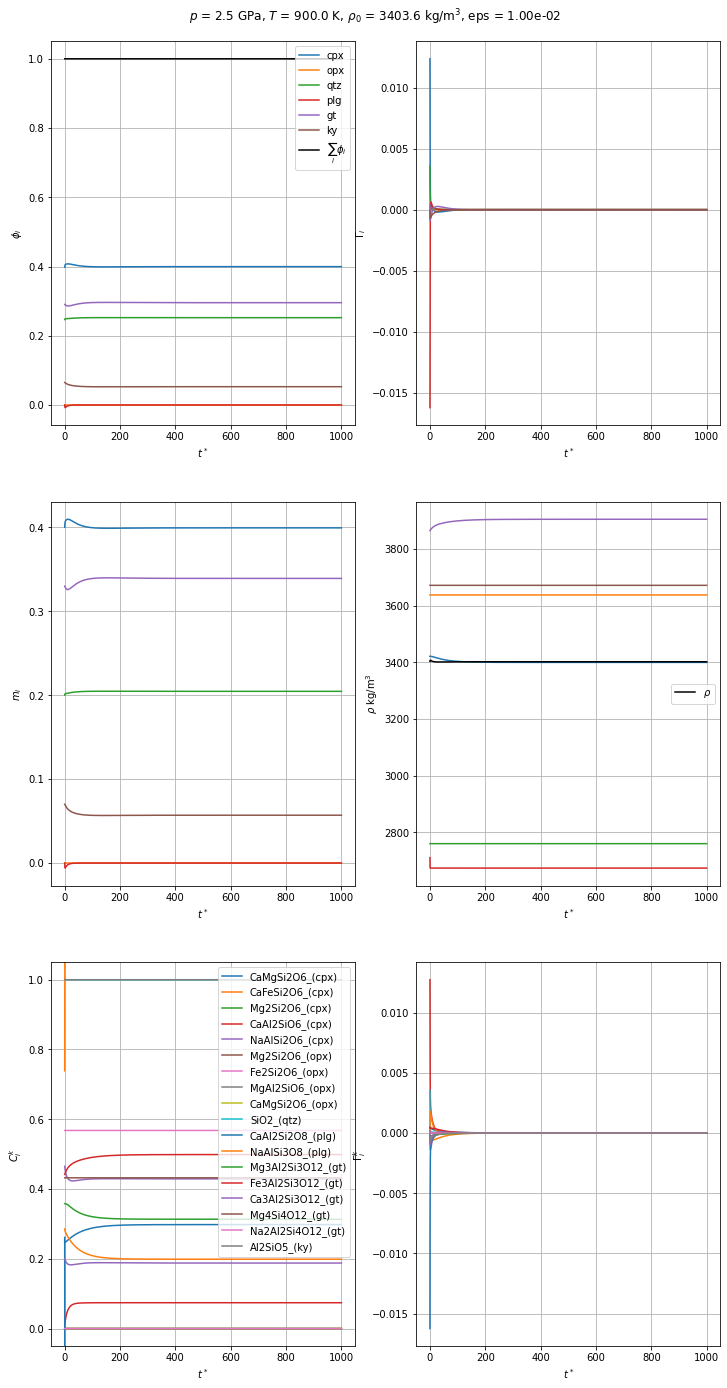

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.400000,0.0,0.200000,0.000000e+00,0.330000,0.070000
Wt% (final),0.399339,0.0,0.204576,-4.656635e-09,0.339123,0.056962


(<py_eclogitization_agu5_slb_rx.eclogitization_agu5_slb_rx at 0x7f354e4ce6f0>,
 <tcg_slb.phasediagram.base.PDReactiveGridDiagnostics at 0x7f355a988490>)

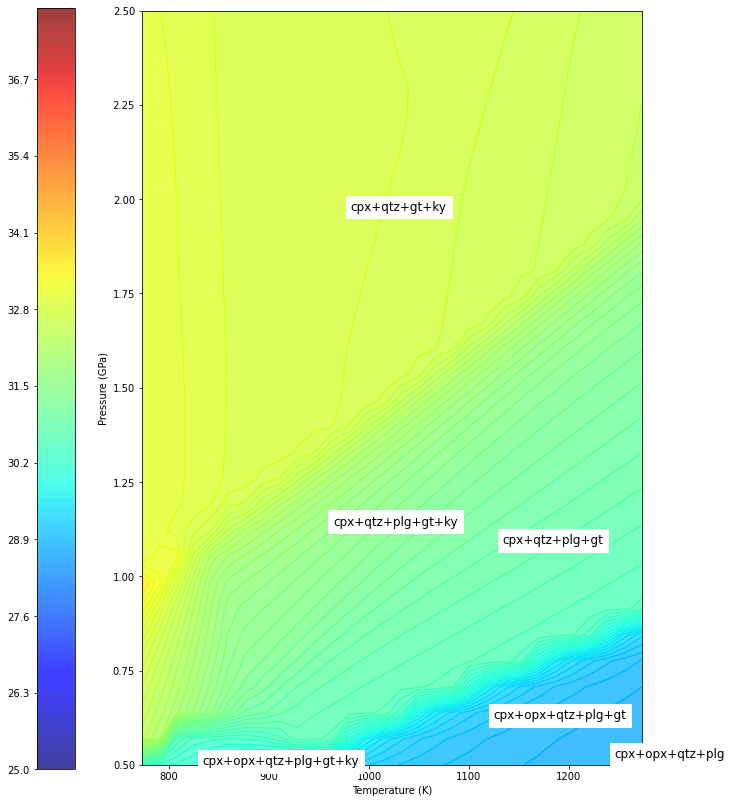

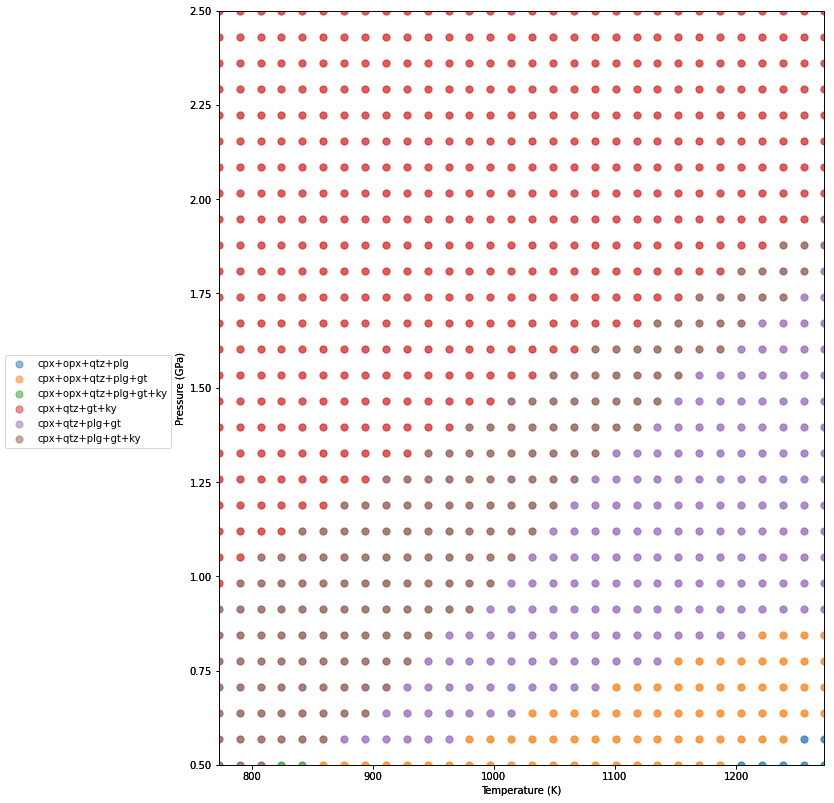

In [4]:
model = EcModel(
    reference,
    "eclogitization_agu5_slb_rx",
    mi0=mi0_eclogite,
    Xik0=Xik0,
    nP=30,
    nT=30,
)

model.run(reload=False,save=True,end_t=1e3)

In [6]:
bdfdiag = model.plot_reaction_grid(
    plot_phases=True,    
    figure_background="figures/krystopowicz-a4.png",
    #figure_xlim = [773.,1273.],
    #figure_ylim = [0.5, 2.5,]
)

#bdfdiag.plot_rho_contours()
#plt.savefig('figs/density-krystopowicz.pdf')

bdfdiag = model.plot_reaction_grid(
    plot_phases=True,
    figure_background="figures/hp62-cropped.png",
    #figure_xlim=[773.0, 1273.0],
    #figure_ylim=[0.5, 2.5,],
)
#bdfdiag.plot_rho_contours()


TypeError: plot_reaction_grid() missing 1 required positional argument: 'bdfgrid'

In [ ]:
bdfdiag.plot_phases()
plt.savefig('figs/hp62-pseudosection.pdf')

In [ ]:
bdfdiag = mcm.plot_reaction_grid(
    rxn,
    grid,
    figure_background="figures/hp62-density-cropped.png",
    figure_xlim=[773.0, 1273.0],
    figure_ylim=[0.5, 2.5,],
)

s=bdfdiag.plot_rho()
s.set_clim([25., 35.])
s.set_cmap('jet')
plt.savefig('figs/hp62-density.pdf')

In [ ]:
s=bdfdiag.plot_rho_contours()
plt.savefig('figs/hp62-density-contours.pdf')

In [ ]:
bdfdiag = mcm.plot_reaction_grid(rxn,grid)
bdfdiag.plot_stime()

In [ ]:
i0 = 2 # doesn't matter as long as you pass cik0
end = 10 # end time

bdfgrid = PDReactiveGrid()

Trange = [1000.]
Prange = np.linspace(0.25, 5.0, 60)
Dagrid = [[None for j in range(len(Trange))] for i in range(len(Prange))]
porosity = [[None for j in range(len(Trange))] for i in range(len(Prange))]

for i, p in enumerate(Prange):
    for j, t in enumerate(Trange):
        poro = (1.0 + np.tanh((p - 3.0)*3.0))/2 # 0 to 1
        Da_val = 0.0001 + ((poro)**10.)
        Dagrid[i][j] = Da_val
        porosity[i][j] = poro

Dagrid = np.asarray(Dagrid)

from matplotlib import pyplot as plt
plt.plot(Dagrid, Prange)
plt.show()

rxn = mcm.get_reaction("eclogitization_agu_slb_rx")


bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0_granulite, Da=0.0001)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho2 = bdfdiag.rhogrid()

bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0_granulite, Da=10.0)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho3 = bdfdiag.rhogrid()

bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0_granulite, Da=Dagrid)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho1 = bdfdiag.rhogrid()

In [ ]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(figsize=(3, 6))
im = ax1.imshow(porosity, cmap="Blues", extent=(20,50,0.25/3000/9.8*1e6,5.0/3000/9.8*1e6), origin="lower", alpha=1., interpolation='bilinear', aspect='auto')
im.set_clim(0.0, 1.8)
ax1.set_ylim(0.25/3000/9.8*1e6,5/3000/9.8*1e6)
ax1.plot(rho2, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k--', alpha=0.5)
ax1.plot(rho3, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k:', alpha=0.5)
ax1.plot(rho1, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k')
ax1.set_xlim(27,35)
ax1.set_xlabel("Density (kg/m$^3$)")
ax1.set_ylabel("Depth (km, $T=1000$ K)")

ax2 = ax1.twiny()
ax2.set_xlim(-0.1,1.1)
ax2.plot(Dagrid, bdfdiag.grid.ygrid/3000/9.8*1e6, 'b', linewidth=0.75)

blue = [0.6,0.7,0.9]
s = ax2.scatter([1],[1], marker='s', color=blue)
ax2.set_xlabel("Damköhler no.")
ax2.legend(['$Da(\\phi)$', '$\\phi(P)$'])
s.remove()
ax1.legend(['$\\rho, Da=0.0001$', '$\\rho, Da=10$','$\\rho, Da(\\phi)$'],loc="lower left")
ax2.xaxis.label.set_color('blue')
ax2.tick_params(axis='x', colors='blue')
plt.gca().invert_yaxis()
plt.savefig('figs/da-model.pdf')